## Step 1: Download the Data From Robert Shiller Online Database

The cyclically-adjusted price-to-earnings (CAPE) ratio of a stock market is one of the standard metrics used to evaluate whether a market is overvalued, undervalued, or fairly-valued.

In [1]:
import numpy as np
import pandas as pd

In [2]:
shiller = pd.read_excel('http://www.econ.yale.edu/~shiller/data/ie_data.xls',
                        sheet_name = 'Data',
                        skiprows=range(7), 
                        skipfooter=1,
                        usecols="A:E")

In [3]:
shiller = shiller.rename(columns={'P':'S&P_Composite','D':'Dividends','E':'Earnings','CPI':'Consumer_Price_Index'})
shiller.head()

,Date,S&P_Composite,Dividends,Earnings,Consumer_Price_Index
0,1871.01,4.44,0.26,0.4,12.464061
1,1871.02,4.50,0.26,0.4,12.844641
2,1871.03,4.61,0.26,0.4,13.034972
3,1871.04,4.74,0.26,0.4,12.559226
4,1871.05,4.86,0.26,0.4,12.273812


In [4]:
shiller.describe()

,Date,S&P_Composite,Dividends,Earnings,Consumer_Price_Index
count,1793.000000,1793.000000,1791.000000,1788.000000,1793.000000
mean,1945.274049,294.898326,6.297866,14.371039,60.475296
std,43.145198,596.216109,11.142674,27.228935,74.021406
min,1871.010000,2.730000,0.180000,0.160000,6.279613
25%,1908.050000,7.860000,0.418350,0.553150,10.180580
50%,1945.090000,17.040000,0.850000,1.402000,19.500000
75%,1983.010000,144.300000,6.866665,14.586650,97.900000
max,2020.050000,3278.202857,59.580604,139.470000,258.678000


In [5]:
def dtparse(dt):
    yr, mo = str(dt).split('.')
    if mo=='1': mo = '10'
    yr = int(yr)
    mo = int(mo)
    return pd.datetime(yr, mo, 1)

In [7]:
shiller['Date'] = shiller['Date'].apply(dtparse)

In [8]:
shiller.head()

,Date,S&P_Composite,Dividends,Earnings,Consumer_Price_Index
0,1871-01-01,4.44,0.26,0.4,12.464061
1,1871-02-01,4.50,0.26,0.4,12.844641
2,1871-03-01,4.61,0.26,0.4,13.034972
3,1871-04-01,4.74,0.26,0.4,12.559226
4,1871-05-01,4.86,0.26,0.4,12.273812


In [9]:
shiller = shiller.set_index('Date')
shiller.head()

,S&P_Composite,Dividends,Earnings,Consumer_Price_Index
Date,,,,
1871-01-01,4.44,0.26,0.4,12.464061
1871-02-01,4.50,0.26,0.4,12.844641
1871-03-01,4.61,0.26,0.4,13.034972
1871-04-01,4.74,0.26,0.4,12.559226
1871-05-01,4.86,0.26,0.4,12.273812


In [10]:
shiller.iloc[-3:]

,S&P_Composite,Dividends,Earnings,Consumer_Price_Index
Date,,,,
2020-03-01,2652.393636,59.580604,NaN,258.115
2020-04-01,2761.975238,NaN,NaN,256.389
2020-05-01,2930.320000,NaN,NaN,255.526


## Step 2: Adjust for Inflation 

In [12]:
shiller['Consumer_Price_Index'].iloc[-1]

255.526

In [13]:
shiller['Consumer_Price_Index'].iloc[-1] / shiller['Consumer_Price_Index'].loc['2019']

Date
2019-01-01    1.015152
2019-02-01    1.010879
2019-03-01    1.005208
2019-04-01    0.999914
2019-05-01    0.997790
2019-06-01    0.997591
2019-07-01    0.995927
2019-08-01    0.995978
2019-09-01    0.995198
2019-10-01    0.992928
2019-11-01    0.993461
2019-12-01    0.994365
Name: Consumer_Price_Index, dtype: float64

In [14]:
shiller['CPI_factor'] = shiller['Consumer_Price_Index'].iloc[-1] / shiller['Consumer_Price_Index']

In [15]:
shiller.loc['2019']

,S&P_Composite,Dividends,Earnings,Consumer_Price_Index,CPI_factor
Date,,,,,
2019-01-01,2607.390000,54.146667,133.056667,251.712,1.015152
2019-02-01,2754.860000,54.543333,133.723333,252.776,1.010879
2019-03-01,2803.980000,54.940000,134.390000,254.202,1.005208
2019-04-01,2903.800000,55.319092,134.683333,255.548,0.999914
2019-05-01,2854.710000,55.698183,134.976667,256.092,0.997790
2019-06-01,2890.170000,56.077275,135.270000,256.143,0.997591
2019-07-01,2996.113636,56.458183,134.480000,256.571,0.995927
2019-08-01,2897.498182,56.839092,133.690000,256.558,0.995978
2019-09-01,2982.156000,57.220000,132.900000,256.759,0.995198


In [16]:
shiller['S&P_Real'] = shiller['S&P_Composite'] * shiller['CPI_factor']
shiller['Dividends_Real'] = shiller['Dividends'] * shiller['CPI_factor']
shiller['Earnings_Real'] = shiller['Earnings'] * shiller['CPI_factor']

In [17]:
shiller.head()

,S&P_Composite,Dividends,Earnings,Consumer_Price_Index,CPI_factor,S&P_Real,Dividends_Real,Earnings_Real
Date,,,,,,,,
1871-01-01,4.44,0.26,0.4,12.464061,20.501023,91.024541,5.330266,8.200409
1871-02-01,4.50,0.26,0.4,12.844641,19.893588,89.521145,5.172333,7.957435
1871-03-01,4.61,0.26,0.4,13.034972,19.603111,90.370341,5.096809,7.841244
1871-04-01,4.74,0.26,0.4,12.559226,20.345680,96.438522,5.289877,8.138272
1871-05-01,4.86,0.26,0.4,12.273812,20.818798,101.179357,5.412887,8.327519


In [18]:
shiller['2020-03']

,S&P_Composite,Dividends,Earnings,Consumer_Price_Index,CPI_factor,S&P_Real,Dividends_Real,Earnings_Real
Date,,,,,,,,
2020-03-01,2652.393636,59.580604,NaN,258.115,0.98997,2625.789033,58.982986,NaN


In [19]:
shiller = shiller.drop(columns=['S&P_Composite', 'Dividends', 'Earnings', 'Consumer_Price_Index', 'CPI_factor'])

In [20]:
shiller.tail(10)

,S&P_Real,Dividends_Real,Earnings_Real
Date,,,
2019-08-01,2885.843047,56.610457,133.152234
2019-09-01,2967.835184,56.945220,132.261792
2019-10-01,2956.621279,57.152925,134.134618
2019-11-01,3084.600118,57.521366,136.382264
2019-12-01,3158.849140,57.911829,138.684113
2020-01-01,3247.132675,58.130645,NaN
2020-02-01,3237.380028,58.413189,NaN
2020-03-01,2625.789033,58.982986,NaN
2020-04-01,2752.678487,NaN,NaN


Let's calculate the *cyclically-adjusted price earnings ratio (CAPE)*. This is the price at a point in time divided by the average earnings over the previous ten years.

In [21]:
# cyclically adjusted price earnings ratio
rolling = shiller.rolling(window=120, min_periods=100)

The value of CAPE is the current price value divided by the rolling average *lagged one period*. We do this by calling `.shift` to shift the time series one period.

In [22]:
shiller['CAPE'] = shiller['S&P_Real'] / rolling['Earnings_Real'].mean().shift()

shiller.tail(15)

,S&P_Real,Dividends_Real,Earnings_Real,CAPE
Date,,,,
2019-03-01,2818.584407,55.226153,135.089964,29.576196
2019-04-01,2903.550013,55.314329,134.671739,30.133517
2019-05-01,2848.400682,55.575082,134.678349,29.242031
2019-06-01,2883.208128,55.942195,134.944160,29.283796
2019-07-01,2983.910625,56.228232,133.932270,29.986685
2019-08-01,2885.843047,56.610457,133.152234,28.705397
2019-09-01,2967.835184,56.945220,132.261792,29.229520
2019-10-01,2956.621279,57.152925,134.134618,28.841123
2019-11-01,3084.600118,57.521366,136.382264,29.836868


##  Step 3: Add Recession Indicator

Added a recession indicator variable (1 or 0) by accessing recession indicators series data from the St. Louis Federal Reserve data service, https://fred.stlouisfed.org/series/USREC.

In [23]:
import pandas_datareader as pdr

recession = pdr.get_data_fred('USREC', '1880')
recession.head()

,USREC
DATE,
1880-01-01,0
1880-02-01,0
1880-03-01,0
1880-04-01,0
1880-05-01,0


In [24]:
recession.index

DatetimeIndex(['1880-01-01', '1880-02-01', '1880-03-01', '1880-04-01',
               '1880-05-01', '1880-06-01', '1880-07-01', '1880-08-01',
               '1880-09-01', '1880-10-01',
               ...
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01'],
              dtype='datetime64[ns]', name='DATE', length=1684, freq=None)

In [25]:
shiller.index

DatetimeIndex(['1871-01-01', '1871-02-01', '1871-03-01', '1871-04-01',
               '1871-05-01', '1871-06-01', '1871-07-01', '1871-08-01',
               '1871-09-01', '1871-10-01',
               ...
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01'],
              dtype='datetime64[ns]', name='Date', length=1793, freq=None)

In [26]:
shiller = shiller.join(recession).dropna()

shiller.head()

,S&P_Real,Dividends_Real,Earnings_Real,CAPE,USREC
Date,,,,,
1880-01-01,130.700165,5.243353,9.954698,14.873284,0.0
1880-02-01,133.002125,5.371240,10.187451,15.116820,0.0
1880-03-01,134.281814,5.447281,10.324498,15.240392,0.0
1880-04-01,136.388173,5.792548,10.971612,15.455535,0.0
1880-05-01,129.398524,6.103704,11.550921,14.631681,0.0


## Step 4: Plot CAPE Model


In [27]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator

In [31]:
# create Series with means and current value repeated
avg = pd.Series(shiller['CAPE'].mean(), index=shiller.index)
median = pd.Series(shiller['CAPE'].median(), index=shiller.index)
curentval = pd.Series(shiller['CAPE'].iloc[-1], index=shiller.index)

<IPython.core.display.Javascript object>


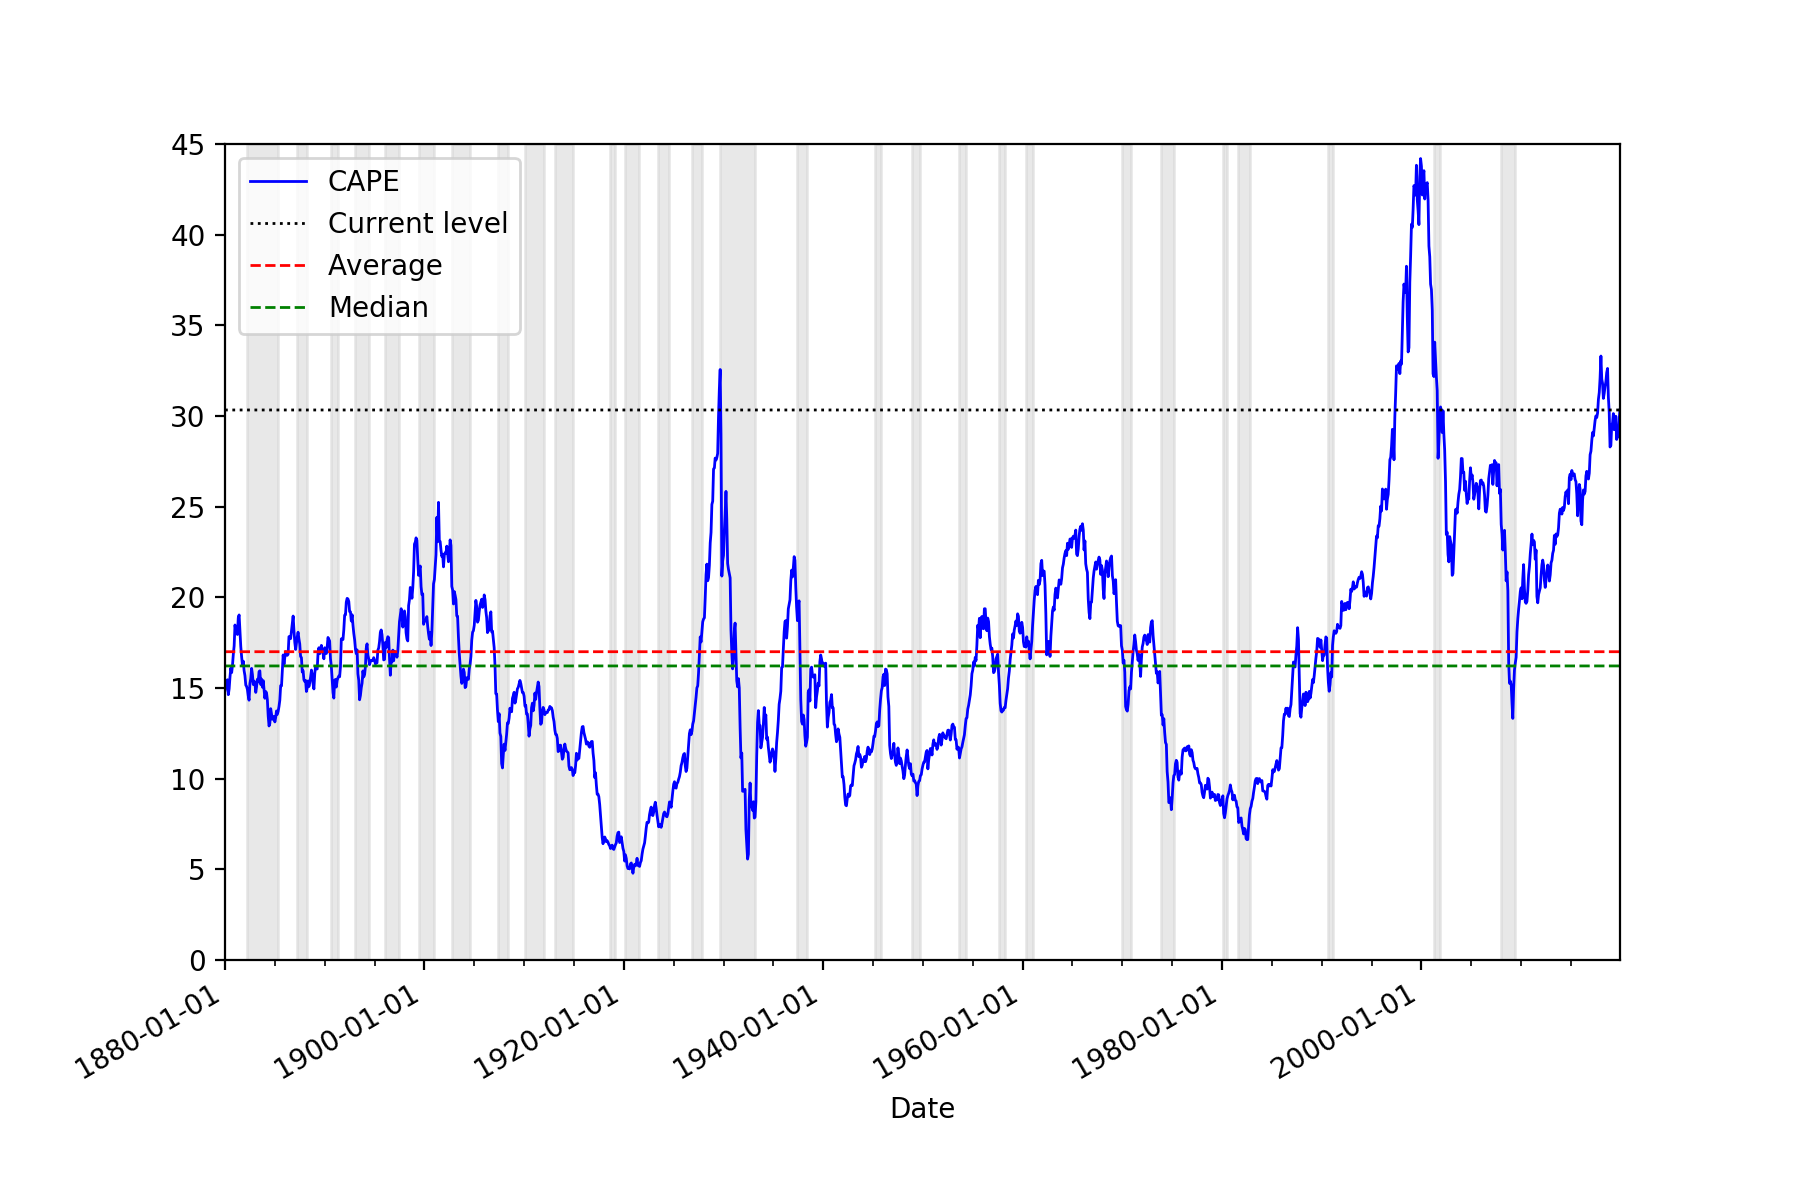

In [32]:
# main plot
ax = shiller['CAPE'].plot(figsize=(9,6), legend=True, x_compat=True, ylim=(0,45), c='b', lw=1)

# change year locations
yrs20 = YearLocator(20)
yrs5 = YearLocator(5)
ax.xaxis.set_major_locator(yrs20)
ax.xaxis.set_minor_locator(yrs5)

# add bells & whistles
curentval.plot(ax=ax, label='Current level', legend=True, c='k', ls=':', lw=1)
avg.plot(ax=ax, label='Average', legend=True, c='r', ls='--', lw=1)
median.plot(ax=ax, label='Median', legend=True, c='g', ls='--', lw=1)
plt.legend(loc=0, fontsize='medium')
ax.fill_between(shiller['CAPE'].index, 0, 45, where=shiller['USREC']==1, 
                facecolor='lightgrey', edgecolor='lightgrey', alpha=0.5)